# Problem 1 - Function Optimization using Annealing

In [11]:
# Setting up imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

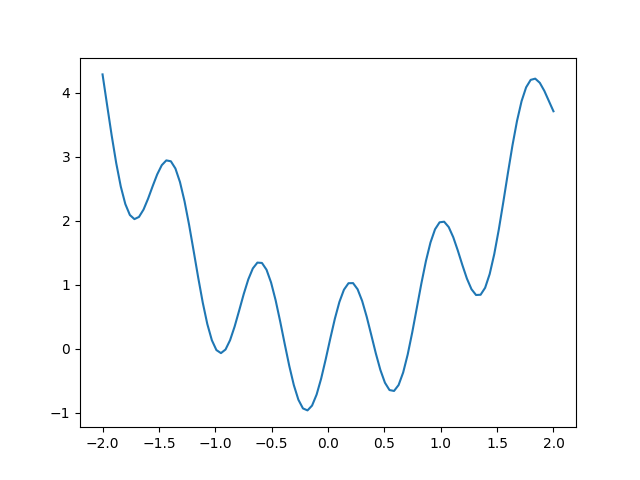

In [12]:
# Function with many minima
def yfun(x):
    return x**2 + np.sin(8*x)

def func(yfunc,p1,p2,p3): # yfunc- function to be optimized, p1-starting point, p2-temperature, p3-decay rate
    xbase = np.linspace(-2, 2, 100)
    ybase = yfunc(xbase)
    global bestcost, bestx, decayrate, T
    # Initial temperature
    bestx = p1
    T = p2
    decayrate = p3
    bestcost = 100000
    rangemin, rangemax = -2, 2 
    fig, ax = plt.subplots()
    ax.plot(xbase, ybase)
    xall, yall = [], []
    lnall,  = ax.plot([], [], 'ro')
    lngood, = ax.plot([], [], 'go', markersize=10)
    def onestep(frame):
        global bestcost, bestx, decayrate, T
        # Generate a random value \in -2, +2
        dx = (np.random.random_sample() - 0.5) * T
        x = bestx + dx
        # print(f"Old x = {x}, delta = {dx}")
        y = yfunc(x)
        if y < bestcost:
            # print(f"Improved from {bestcost} at {bestx} to {y} at {x}")
            bestcost = y
            bestx = x
            lngood.set_data(x, y)
        else:
            toss = np.random.random_sample()
            if toss < np.exp(-(y-bestcost)/T):
                bestcost = y
                bestx = x
                lngood.set_data(x, y)
            # print(f"New cost {y} worse than best so far: {bestcost}")
            pass
        T = T * decayrate
        xall.append(x)
        yall.append(y)
        lnall.set_data(xall, yall)
        # return lngood,

    ani= FuncAnimation(fig, onestep, frames=range(100), interval=100, repeat=False)
    plt.show()
    return ani
func(yfun,-2,3,0.95)

* **In Simulated Annealing, a random search is made through the entire searchspace and based on the totalcost, a move can either be classified as good or bad.**
* **The good moves are accepted directly and the bad moves are accepted with a probability dependent on the error percentage and temperature.**
* **The general choice for hyperparameters like T, decayrate etc are made by hyperparameter tuning methods like gridsearchCV , randomisedsearchCV for a given searchspace.** 
* **The classical version of simulated annealing is based on a cooling schedule. Generally, the initial temperature is set such that the acceptance ratio of bad moves is equal to a certain value n0.**
* **We study the behaviour of the acceptance probability. It is shown that this function is convex for low temperatures and concave for high temperatures.**
* **The decay rate determines the pace of randomness of the values chosen from the searchspace, i.e. for a larger decay rate, Temperature decays slowly and hence the randomizing factor will come down slowly.**
* **The starting point, for obvious reasons, will reduce the iterations/time taken to reach the optimum point and increases accuracy if chosen near the global optimum.**

# Problem 2 - Travelling Salesman Problem

### Importing modules

In [13]:
#importing required libraries and packages
import math
import random
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
#import copy

### Data Extraction

In [14]:
f=open('tsp_100.txt','r') #file is opened and mapped to a file pointer/object
l=f.readlines()
l=[i.rstrip('\n').split() for i in l] #file is read in the required form
#print(l)
length=int(l[0][0])
#flist=[]
l.pop(0)
for i in range(length):
    for j in range(2):
        l[i][j]=float(l[i][j])
#print(l)
flist=l.copy()

### Function Definition

In [15]:
def dis(l): # function for finding the total distance traversed by salesman in the given order
    sum=0
    for i in range(len(l)-1):
        sum+=math.sqrt((l[i+1][0]-l[i][0])**2+(l[i+1][1]-l[i][1])**2)
    sum+=math.sqrt((l[len(l)-1][0]-l[0][0])**2+(l[len(l)-1][1]-l[0][1])**2)
    return sum

def shufflel(l,num): # function for swapping two random elements for a certain number of times, dependent on the temperature 
    for i in range(num):
        i=random.randrange(0,len(l))
        j=random.randrange(0,len(l))
        while j==i:
            j=random.randrange(0,len(l))
        l[i],l[j]=l[j],l[i]
    return l

def reversel(l): # function for reversing all the elements of the list lying between two randomly generated indices
    i=random.randrange(0,len(l))
    j=random.randrange(0,len(l))
    l[i:j+1] = l[i:j+1][::-1]
    return l

#flist=[]
#for i in range(len(x_cities)):
    #flist.append([x_cities[i],y_cities[i]])
    
d={} # dictionary taken for mapping list and the order of inputs
for i in range(len(flist)):
    d[tuple(flist[i])]=i

### Optimization Function

In [17]:
def func(dist,lis,p2,p3): # main function for optimization
    
    global bestcost, bestl, decayrate, T,step
    step=0
    bestl = list(lis)
    T = p2
    decayrate = p3
    bestcost = 1000
    N=100000 # number of iterations to run the function
    #fig, ax = plt.subplots()
    #xall, yall = [], []
    #lnall,  = ax.plot([], [], 'ro')
    #lngood, = ax.plot([], [], 'go', markersize=10)
    
    def onestep():
        global bestcost, bestl, decayrate, T,step
        for i in range(N):
            #g=len(lis)-int(math.floor(len(lis)*((step/N)**0.0001)))
            #g=len(lis)-int(math.floor(len(lis)*(np.exp(-(60-bestcost)/T))))
            #i=random.randrange(0,len(lis),1)
            #print(min(g,len(lis)-i))
            #l=lis[:i]+random.sample(lis[i:min(i+g,len(lis))],min(g,len(lis)-i))+lis[i+g:len(lis)]
            #l=random.sample(bestl,len(lis))
            #l=list(shufflel(list(bestl),g))
            #the above statements were written for various other algorithms and optimization techniques
            
            l=list(reversel(bestl.copy()))
            y = dist(l)
            
            if y <= bestcost: # accepting the new value if its lesser than previous minimum
                bestcost = y
                bestl = list(l)
                #lngood.set_data(step, y)
                #print("good")
            
            else:
                toss = np.random.random_sample()
                #print("bad")
                if toss < np.exp(-(y-bestcost)/T): # accepting the value with a probability that depends 
                                                   # on the error percentage and the temperature(iteration number) 
                    bestcost = y
                    bestl = list(l)
                    #lngood.set_data(step, y)
                    #print("nice")
                pass
            
            #if step%10==0: - can be used if overflow error occurs

            T = T * decayrate
            #xall.append(step)
            #yall.append(y)
            #lnall.set_data(xall, yall)
            step+=1
            
            #return lngood,                       
        #for i in range(N):
            #onestep(0)
            #print(bestl)
    onestep()
    return bestl,bestcost # returns the solution order list and minimum list
    
    #ani= FuncAnimation(fig, onestep, frames=range(100), interval=100, repeat=False)
    #plt.show()
    #return ani
    
soln,solnd=func(dis,flist,100,0.99)
finalorder=[d[tuple(x)] for x in soln] # getting the solution list mapped to the initial order
#print(soln)
print(solnd) # minimum distance obtained from this algorithm
print(finalorder) # optimal order of traversal for minimum distance

81.21544743535428
[57, 38, 63, 95, 0, 34, 39, 15, 50, 42, 84, 86, 25, 30, 19, 52, 65, 93, 14, 27, 7, 99, 18, 16, 76, 6, 80, 36, 22, 21, 54, 3, 55, 31, 53, 97, 29, 59, 71, 90, 73, 96, 64, 28, 77, 91, 20, 66, 9, 11, 37, 81, 44, 1, 70, 79, 43, 83, 69, 35, 10, 85, 67, 78, 8, 26, 5, 2, 89, 41, 17, 88, 4, 61, 60, 24, 74, 40, 94, 13, 23, 98, 62, 33, 32, 82, 46, 58, 75, 48, 49, 51, 68, 47, 56, 45, 87, 92, 72, 12]


* **The algorithm involves gradient descent with simulated annealing, by having the input list as the x-parameter and the distance using the list as its cost function.**
* **The descent is implemented using the `reversel()` function, which reverses the part of list between two randomly generated indices. Other ways might include swapping two random elements for n times, where n decays as it involves some function of temperature.**
* **The optimization function depends on the intial temperature, decayrate, starting point and the number of iterations(N), which can be altered to optimize it further.**
* **The final order of traversal is plotted with the help of the corresponding solution list.**

### Solution Plot

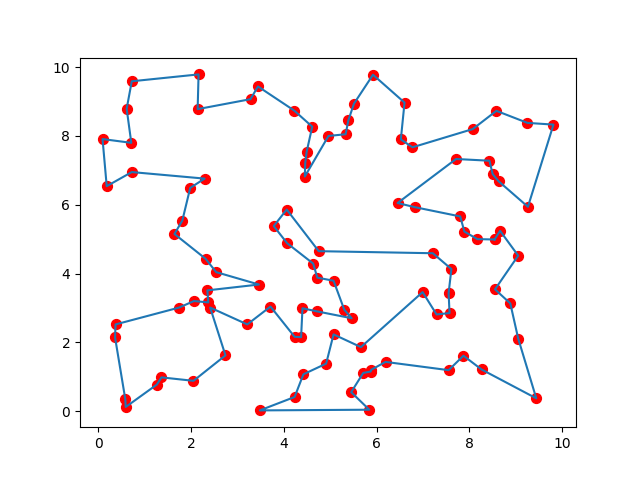

In [18]:
xs = [soln[i][0] for i in range(len(soln))]
ys = [soln[i][1] for i in range(len(soln))]
xs.append(xs[0])
ys.append(ys[0])

plt.plot(xs,ys)
plt.scatter(xs,ys, s=50, marker='o', c='r')
plt.show()